# Seyed Mohammad Amin Atyabi - 830402014

# Linear Separability

**1**

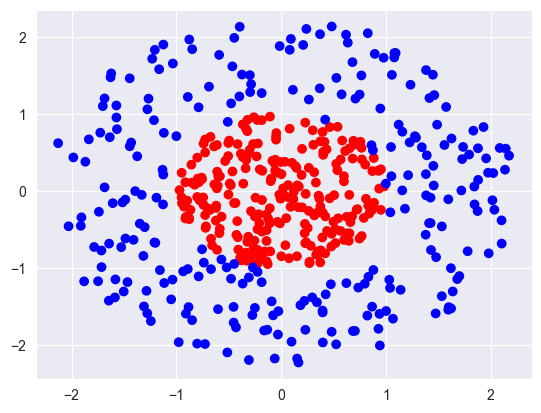

In [1]:
import numpy
from matplotlib import pyplot as plt


def random_point(radius, radius_start):
    alpha = 2 * numpy.pi * numpy.random.random()
    r = radius * numpy.sqrt(numpy.random.random() + (radius_start / 4))
    x = r * numpy.cos(alpha)
    y = r * numpy.sin(alpha)
    return x, y


color = {'r': 0.0, 'b': 1.0}

point_count = 250
X = []
Y = []
Z = []
for i in range(point_count):
    x, y = random_point(1, 0)
    X.append(x)
    Y.append(y)
    Z.append('r')

for i in range(point_count):
    x, y = random_point(2, 1)
    X.append(x)
    Y.append(y)
    Z.append('b')

data = numpy.array([X, Y])
Z = numpy.array(Z)

plt.scatter(data[0], data[1], color=Z)
plt.show()

**2**

Theta: [0.05883225 0.12394334 0.04606934]
Accuracy: 0.434


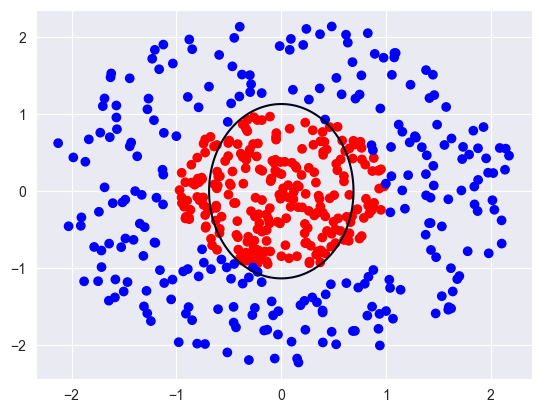

In [2]:
from sklearn.metrics import accuracy_score

label = Z.copy()
label[label == 'r'] = color['r']
label[label == 'b'] = color['b']
label = label.astype(float)


def sigmoid(x, theta):
    return 1 / (1 + numpy.exp(-numpy.dot(x, theta)))


def cost_function(theta, X, y):
    m = X.shape[0]
    h = sigmoid(X, theta)
    loss = (-1 / m) * numpy.sum(y * numpy.log(h) + (1 - y) * numpy.log(1 - h))
    return loss


def gradient_descent(theta, X, y, learning_rate, iterations):
    m = X.shape[0]
    for _ in range(iterations):
        h = sigmoid(X, theta)
        error = h - y
        delta_theta = (1 / m) * numpy.dot(X.T, error)
        theta -= learning_rate * delta_theta
    return theta


theta = numpy.random.rand(3)

learning_rate = 0.01
num_iterations = 1000

data = numpy.array([numpy.full(shape=500, fill_value=1, dtype=int), data[0], data[1]]).transpose()

theta = gradient_descent(theta, data, label, learning_rate, num_iterations)
print(f'Theta: {theta}')

y_pred = numpy.round(sigmoid(data, theta))

accuracy = accuracy_score(label, y_pred)
print(f'Accuracy: {accuracy}')

plt.scatter(data.transpose()[1], data.transpose()[2], color=Z)

x = numpy.linspace(-2.0, 2.0, 1000)
y = numpy.linspace(-2.0, 2.0, 1000)
X, Y = numpy.meshgrid(x, y)
F = (theta[1] * (X ** 2)) + (theta[2] * (Y ** 2)) - theta[0]
plt.contour(X, Y, F, [0])
plt.show()

# Predict Car Price Using Linear Regression

**1**

In [3]:
import pandas

car_data = pandas.read_csv('data/car details v4.csv')

car_data['Engine'] = car_data['Engine'].str.replace(' cc', '')
car_data['Engine'] = pandas.to_numeric(car_data['Engine'], errors='coerce', downcast='integer')

pattern_pw = r'(\d+)(?:\s*bhp)?\s*@\s*(\d+)(?:\s*rpm)?'
car_data[['Power', 'Power RPM']] = car_data['Max Power'].str.extract(pattern_pw).astype(float)

pattern_trq = r'(\d+)(?:\s*Nm)?\s*@\s*(\d+)(?:\s*rpm)?'
car_data[['Torque', 'Torque RPM']] = car_data['Max Torque'].str.extract(pattern_trq).astype(float)

car_data = car_data.drop(columns=['Max Power', 'Max Torque'])

car_data.describe()

,Price,Year,Kilometer,Engine,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Power,Power RPM,Torque,Torque RPM
count,2.059000e+03,2059.000000,2.059000e+03,1979.000000,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000,1975.000000,1975.000000,1979.000000,1979.000000
mean,1.702992e+06,2016.425449,5.422471e+04,1692.575543,4280.860652,1767.991980,1591.735338,5.306266,52.002210,129.538734,4835.093671,308.453765,2619.545225
std,2.419881e+06,3.363564,5.736172e+04,643.736294,442.458507,135.265825,136.073956,0.822170,15.110198,65.153364,1097.368548,675.608440,1206.314770
min,4.900000e+04,1988.000000,0.000000e+00,624.000000,3099.000000,1475.000000,1165.000000,2.000000,15.000000,7.000000,2910.000000,8.000000,150.000000
25%,4.849990e+05,2014.000000,2.900000e+04,1197.000000,3985.000000,1695.000000,1485.000000,5.000000,41.250000,83.000000,4000.000000,115.000000,1600.000000
50%,8.250000e+05,2017.000000,5.000000e+04,1498.000000,4370.000000,1770.000000,1545.000000,5.000000,50.000000,116.000000,4200.000000,200.000000,1900.000000
75%,1.925000e+06,2019.000000,7.200000e+04,1995.000000,4629.000000,1831.500000,1675.000000,5.000000,60.000000,171.000000,6000.000000,350.000000,4000.000000
max,3.500000e+07,2022.000000,2.000000e+06,6592.000000,5569.000000,2220.000000,1995.000000,8.000000,105.000000,660.000000,8250.000000,7619.000000,6500.000000


In [4]:
car_data['price_cat'] = numpy.select(
    [car_data['Price'] >= 1925000,
     car_data['Price'] <= 490000,
     car_data['Price'].between(490000, 825000),
     car_data['Price'].between(825000, 1925000)],
    ['0', '1', '2', '3'],
    numpy.nan
)

car_data

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Power,Power RPM,Torque,Torque RPM,price_cat
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,...,3990.0,1680.0,1505.0,5.0,35.0,87.0,6000.0,109.0,4500.0,2
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,...,3995.0,1695.0,1555.0,5.0,42.0,74.0,4000.0,190.0,2000.0,1
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,...,3585.0,1595.0,1550.0,5.0,35.0,79.0,6000.0,7619.0,4000.0,1
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,...,3995.0,1745.0,1510.0,5.0,37.0,82.0,6000.0,113.0,4200.0,2
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,...,4735.0,1830.0,1795.0,7.0,55.0,148.0,3400.0,343.0,1400.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,...,4585.0,1890.0,1785.0,7.0,70.0,138.0,3750.0,330.0,1600.0,3
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,...,3495.0,1550.0,1500.0,5.0,32.0,55.0,5500.0,75.0,4000.0,1
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,...,3795.0,1680.0,1427.0,5.0,45.0,70.0,6250.0,102.0,4000.0,1
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,...,4936.0,1868.0,1479.0,5.0,65.0,188.0,4000.0,400.0,1750.0,0


In [5]:
from sklearn.model_selection import train_test_split

car_feature = car_data.drop(columns=['Price'])
car_price = car_data['Price']

x_train, x_test, y_train, y_test = train_test_split(car_feature, car_price, test_size=0.2, stratify=car_feature['price_cat'])

**2**

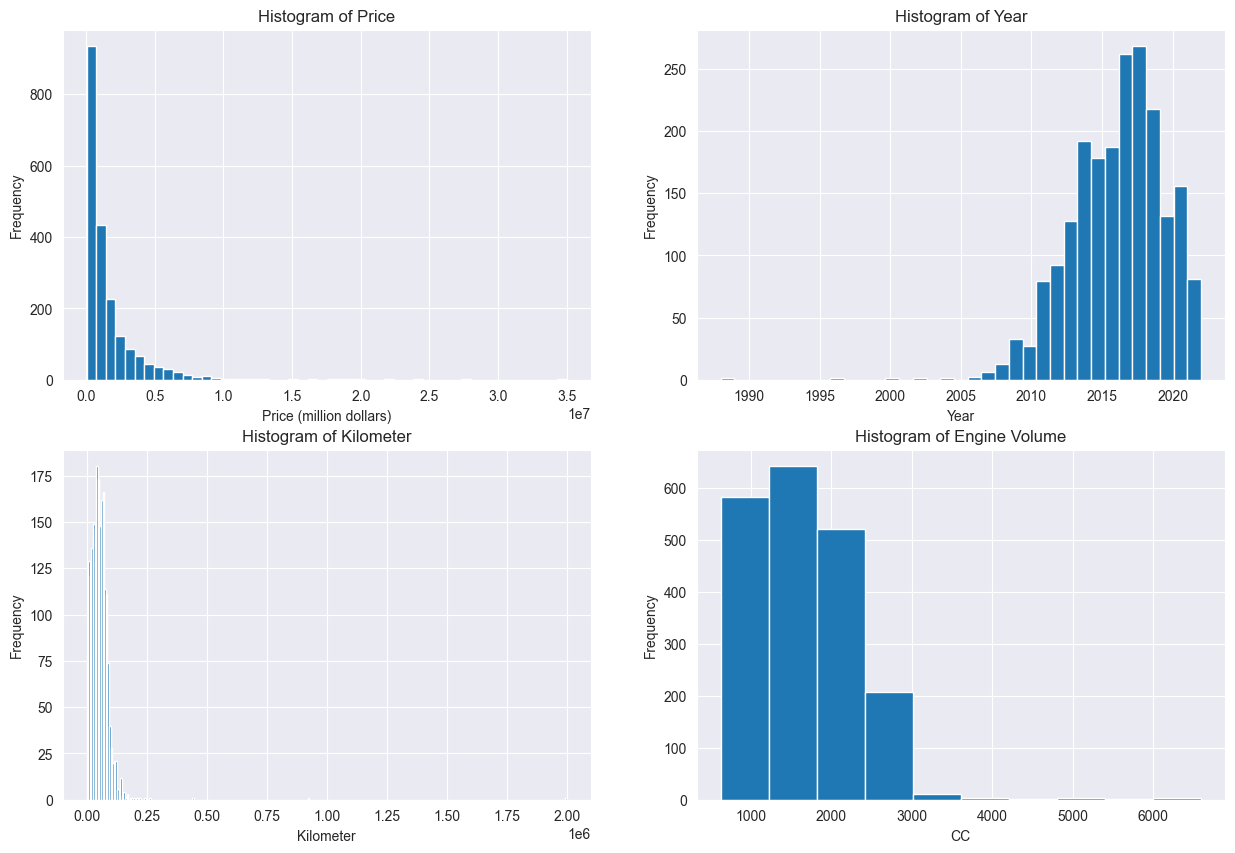

In [6]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.hist(car_data['Price'], bins=50)
plt.title('Histogram of Price')
plt.xlabel('Price (million dollars)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(car_data['Year'], bins=35)
plt.title('Histogram of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(car_data['Kilometer'], bins=300)
plt.title('Histogram of Kilometer')
plt.xlabel('Kilometer')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(car_data['Engine'], bins=10)
plt.title('Histogram of Engine Volume')
plt.xlabel('CC')
plt.ylabel('Frequency')

plt.show()

In [7]:
car_model_mean_price = car_data.groupby(['Model'])['Price'].mean().astype(int).reset_index()
car_model_mean_price

,Model,Price
0,2 Series Gran Coupe 220d M Sport [2020-2021],4200000
1,3-Series 320d,800000
2,3-Series 320d Highline Sedan,1200000
3,3-Series 320d Luxury Edition,4550000
4,3-Series 320d Luxury Line,2534374
...,...,...
1045,i20 Magna 1.4 CRDI,340000
1046,i20 Sportz 1.2,375000
1047,i20 Sportz 1.2 (O),305000
1048,i20 Sportz 1.2 BS-IV,350000


**3**

In [8]:
car_data_count_before_delete = len(car_data)
car_data.dropna(subset=['Drivetrain', 'Fuel Tank Capacity', 'Power'], inplace=True)
print(car_data.isnull().sum())

Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
Power                 0
Power RPM             0
Torque                0
Torque RPM            0
price_cat             0
dtype: int64


In [9]:
print(car_data.isnull().mean() * 100)

Make                  0.0
Model                 0.0
Price                 0.0
Year                  0.0
Kilometer             0.0
Fuel Type             0.0
Transmission          0.0
Location              0.0
Color                 0.0
Owner                 0.0
Seller Type           0.0
Engine                0.0
Drivetrain            0.0
Length                0.0
Width                 0.0
Height                0.0
Seating Capacity      0.0
Fuel Tank Capacity    0.0
Power                 0.0
Power RPM             0.0
Torque                0.0
Torque RPM            0.0
price_cat             0.0
dtype: float64


In [10]:
car_data_count_after_delete = len(car_data)
print(f'{car_data_count_before_delete - car_data_count_after_delete} Entity lost')

187 Entity lost


**4**

In [11]:
from sklearn.preprocessing import LabelEncoder

car_model_encoder = LabelEncoder()
car_make_encoder = LabelEncoder()
car_color_encoder = LabelEncoder()
car_location_encoder = LabelEncoder()
car_drivetrain_encoder = LabelEncoder()
car_fuel_encoder = LabelEncoder()
car_transmission_encoder = LabelEncoder()
car_owner_encoder = LabelEncoder()
car_seller_encoder = LabelEncoder()
    
car_data['Model'] = car_model_encoder.fit_transform(car_data['Model'])
car_data['Make'] = car_make_encoder.fit_transform(car_data['Make'])
car_data['Color'] = car_color_encoder.fit_transform(car_data['Color'])
car_data['Location'] = car_location_encoder.fit_transform(car_data['Location'])
car_data['Drivetrain'] = car_drivetrain_encoder.fit_transform(car_data['Drivetrain'])
car_data['Fuel Type'] = car_fuel_encoder.fit_transform(car_data['Fuel Type'])
car_data['Transmission'] = car_transmission_encoder.fit_transform(car_data['Transmission'])
car_data['Owner'] = car_owner_encoder.fit_transform(car_data['Owner'])
car_data['Seller Type'] = car_seller_encoder.fit_transform(car_data['Seller Type'])

car_data

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Power,Power RPM,Torque,Torque RPM,price_cat
0,7,92,505000,2017,87150,5,1,55,7,0,...,3990.0,1680.0,1505.0,5.0,35.0,87.0,6000.0,109.0,4500.0,2
1,18,730,450000,2014,75000,2,1,40,14,1,...,3995.0,1695.0,1555.0,5.0,42.0,74.0,4000.0,190.0,2000.0,1
2,8,939,220000,2011,67000,5,1,39,8,0,...,3585.0,1595.0,1550.0,5.0,35.0,79.0,6000.0,7619.0,4000.0,1
3,29,452,799000,2019,37500,5,1,41,12,0,...,3995.0,1745.0,1510.0,5.0,37.0,82.0,6000.0,113.0,4200.0,2
4,29,502,1950000,2018,69000,2,1,45,7,0,...,4735.0,1830.0,1795.0,7.0,55.0,148.0,3400.0,343.0,1400.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,18,640,245000,2014,79000,5,1,20,14,1,...,3775.0,1680.0,1620.0,5.0,43.0,85.0,6000.0,113.0,4500.0,1
2054,17,913,850000,2016,90300,2,1,65,14,0,...,4585.0,1890.0,1785.0,7.0,70.0,138.0,3750.0,330.0,1600.0,3
2055,8,378,275000,2014,83000,5,1,1,14,1,...,3495.0,1550.0,1500.0,5.0,32.0,55.0,5500.0,75.0,4000.0,1
2056,6,417,240000,2013,73000,5,1,66,13,0,...,3795.0,1680.0,1427.0,5.0,45.0,70.0,6250.0,102.0,4000.0,1


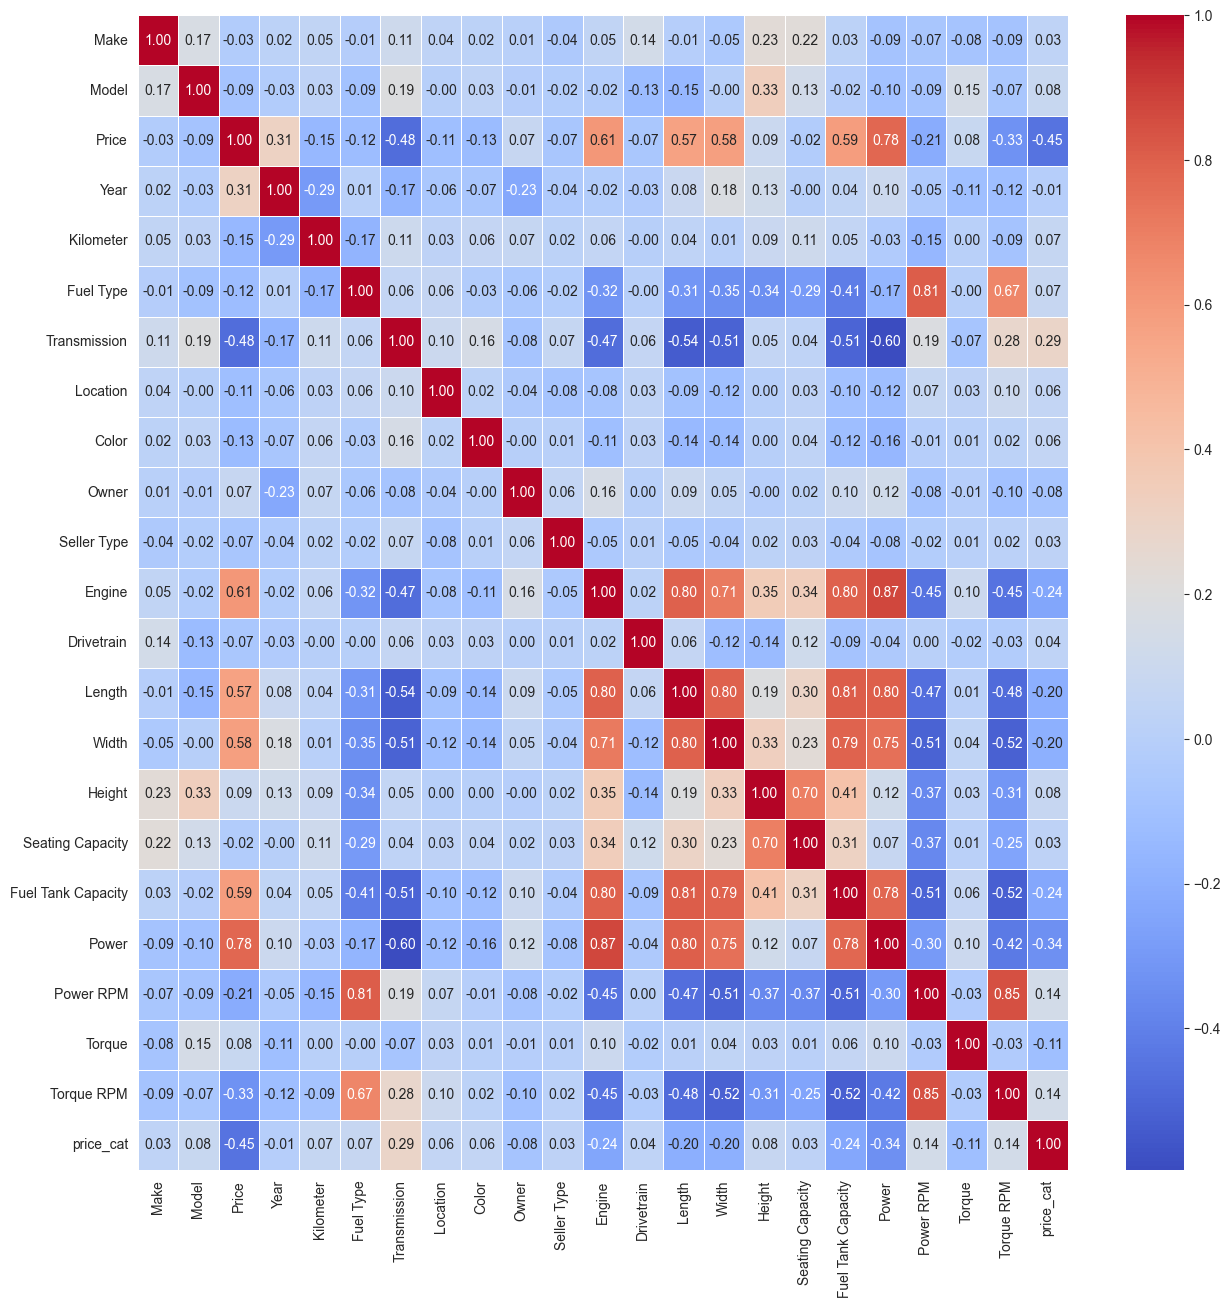

In [12]:
import seaborn

plt.figure(figsize=(15, 15))
seaborn.heatmap(car_data.corr(), annot=True, cmap="coolwarm", linewidths=.5, fmt=".2f")
plt.show()

**5**

Converter in previous part

**6**

In [26]:
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

car_feature = car_data.drop(columns=['Price'])
car_price = car_data['Price']

x_train, x_test, y_train, y_test = train_test_split(car_feature, car_price, test_size=0.2, stratify=car_feature['price_cat'])

warnings.filterwarnings('ignore')

parameters = {'alpha': numpy.linspace(0, 1, 100)}

lasso = Lasso()

gscv_lasso = GridSearchCV(lasso, parameters, scoring='r2')
gscv_lasso_results = gscv_lasso.fit(x_train, y_train)

print(f'Lasso R2 Score : {gscv_lasso_results.best_score_}')
print(f'Lasso Best Parameter : {gscv_lasso_results.best_params_}')

Lasso R2 Score : 0.7048437095400232
Lasso Best Parameter : {'alpha': 1.0}


In [25]:
from sklearn.linear_model import Ridge

ridge = Ridge()

gscv_ridge = GridSearchCV(ridge, parameters, scoring='r2')
gscv_ridge_results = gscv_ridge.fit(x_train, y_train)

print(f'Ridge R2 Score : {gscv_ridge_results.best_score_}')
print(f'Ridge Best Parameter : {gscv_ridge_results.best_params_}')

ridge R2 Score : 0.6707511220318734
ridge Best Parameter : {'alpha': 1.0}


**7**

In [37]:
from sklearn.metrics import get_scorer


y_pred_lasso = gscv_lasso.predict(x_test)
y_pred_ridge = gscv_ridge.predict(x_test)

scorer = get_scorer('r2')
lasso_r2_score = scorer(gscv_lasso, x_test, y_test)
ridge_r2_score = scorer(gscv_ridge, x_test, y_test)

scorer = get_scorer('neg_root_mean_squared_error')
lasso_rmse_score = scorer(gscv_lasso, x_test, y_test)
ridge_rmse_score = scorer(gscv_ridge, x_test, y_test)

print(f'Lasso R2 Score : {lasso_r2_score}')
print(f'Ridge R2 Score : {ridge_r2_score}')
print(f'Lasso Rmse Score : {abs(lasso_rmse_score)}')
print(f'Ridge Rmse Score : {abs(ridge_rmse_score)}')

Lasso R2 Score : 0.5341557951950355
Ridge R2 Score : 0.6024301582586491
Lasso Rmse Score : 1439777.679655086
Ridge Rmse Score : 1330092.377023808


**8**